# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
from numpy import percentile
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice = range(1,7)
roll = []
for i in range(10):
    roll.append(random.choice(dice))
dice_df = pd.DataFrame({'dice_number' : roll})
dice_df


,dice_number
0,1
1,6
2,3
3,5
4,6
5,1
6,2
7,3
8,6
9,3


#### 2.- Plot the results sorted by value.

In [3]:
# your code here
new_dice = dice_df.sort_values(by=['dice_number'],ascending=False)
#new_dice

Text(0.5, 1.0, 'Dice numbers rolled')

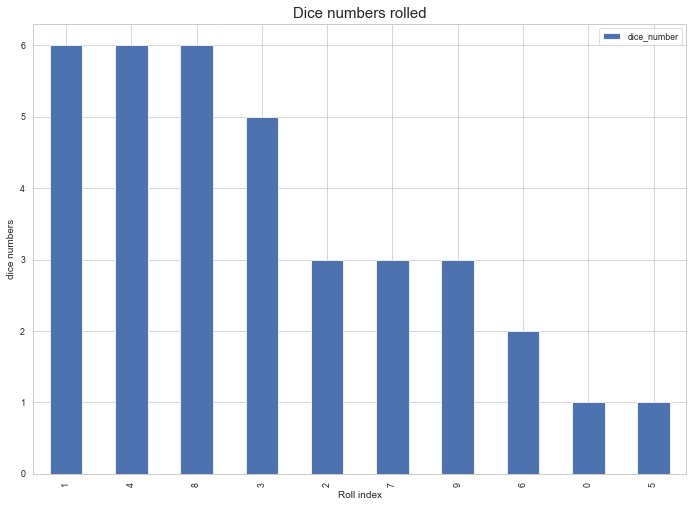

In [4]:
#plot size definition
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style = 'whitegrid',context = 'paper')

new_dice.plot.bar()
plt.xlabel("Roll index",fontsize=10)
plt.ylabel("dice numbers",fontsize=10)
plt.title("Dice numbers rolled",fontsize = 15)
#paolo: very well!

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

Text(0.5, 1.0, 'Frequency distribution plot for dice numbers')

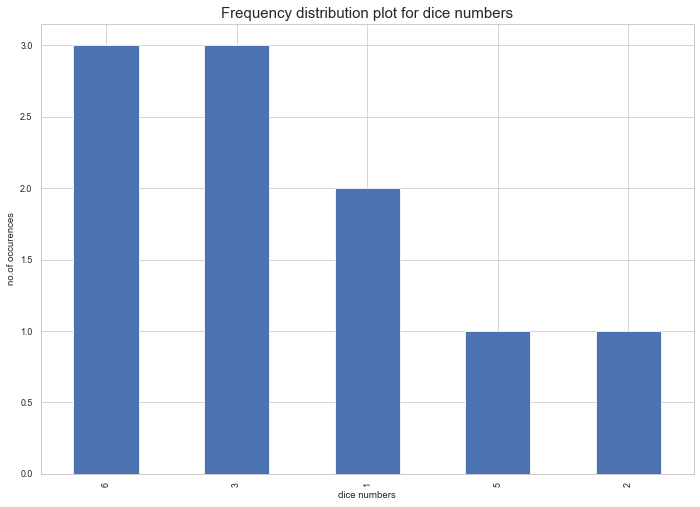

In [5]:
# your code here
fig, ax = plt.subplots()
dice_df['dice_number'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel("dice numbers")
plt.ylabel("no.of occurences")
plt.title("Frequency distribution plot for dice numbers", fontsize = 15)

In [ ]:
#paolo: yes- you could also use hist instead of bar, that is how a standard distribution is usually calculated

In [6]:
"""
The first plot shows the dice numbers displayed (sorted order) in individual roll event.
While second plot also shows dice numbers, but the no.of times(occurences/frequency)they came up in the whole event.

"""

'\nThe first plot shows the dice numbers displayed (sorted order) in individual roll event.\nWhile second plot also shows dice numbers, but the no.of times(occurences/frequency)they came up in the whole event.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(df):
    return df.sum()/len(df)
mean(dice_df)


dice_number    3.6
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
#Frequency distribution calculated and stored in variable "freq"
freq = pd.DataFrame(dice_df['dice_number'].value_counts())

In [9]:
dice_df_mean = dice_df['dice_number'].sum()/freq.sum()
dice_df_mean
#Mean is same as before

dice_number    3.6
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
#median is calculated differently depending whether the no.of observations is odd or even.
def median(df,column):
    mid = ((len(df[column])) / 2)
    if len(df[column]) % 2 == 0:
        return (mid + (mid -1)) / 2
    else:
        return mid

median(new_dice, 'dice_number')

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
def quartiles (df, column):
    df = df.sort_values(column)
    Q1 = df.iloc[int(len(df[column])/4)][column]
    Q2 = median(df, column)
    Q3 = df.iloc[-int(len(df[column])/4)][column]
    return print([Q1, Q2, Q3])

quartiles(new_dice, 'dice_number')

[2, 4.5, 6]


In [41]:
#using built-in function

new_dice.quantile([.25, .5, .75], axis = 0) 


,dice_number
0.25,2.25
0.50,3.00
0.75,5.75


In [42]:
#paolo: good idea to check and why does the builtin funtion gives different results to your function?

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [43]:
# your code here
data_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
data_100_sort = data_100.sort_values(by = ["value"],ascending=False)
data_100_sort

,Unnamed: 0,roll,value
99,99,99,6
36,36,36,6
23,23,23,6
24,24,24,6
90,90,90,6
...,...,...,...
89,89,89,1
47,47,47,1
73,73,73,1
56,56,56,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Dice numbers rolled')

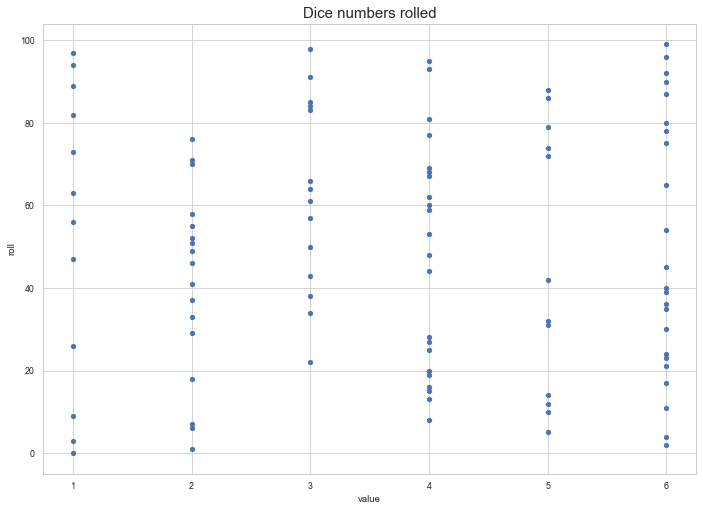

In [44]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(style = 'whitegrid',context = 'paper')

data_100_sort.plot.scatter("value","roll")

plt.title("Dice numbers rolled",fontsize = 15)

#@Paulo : Preferred to have a scatter plot here. But can't figure out the warning . 
#paolo: dont know this warining either but why do you use scatter plot here? Should use same technique as first plot

In [15]:
"""
Most no.of dots are seen for number 6, which means 6 is the most frequently occured outcome followed by 4.
"""

'\nMost no.of dots are seen for number 6, which means 6 is the most frequently occured outcome followed by 4.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [45]:
# your code here
print(mean(data_100))
#Mean value is 3.74

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64


#### 3.- Now, calculate the frequency distribution.


In [17]:
# your code here
freq_data = data_100['value'].value_counts()
freq_data

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

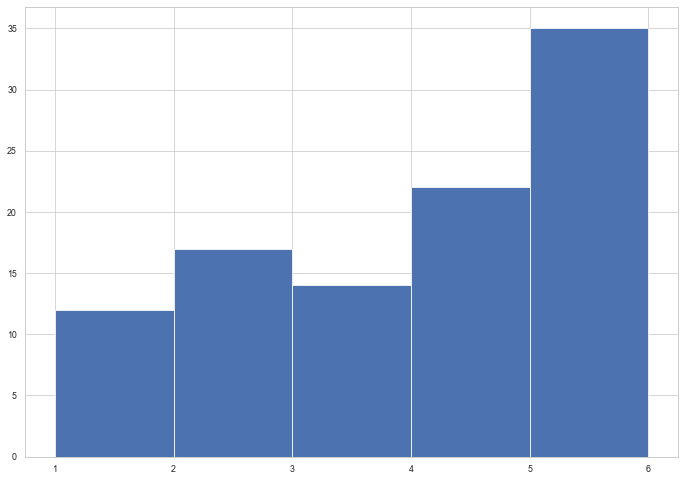

In [18]:
# your code here
data_100_sort.value.hist(bins=5)
#paolo: yes

In [19]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

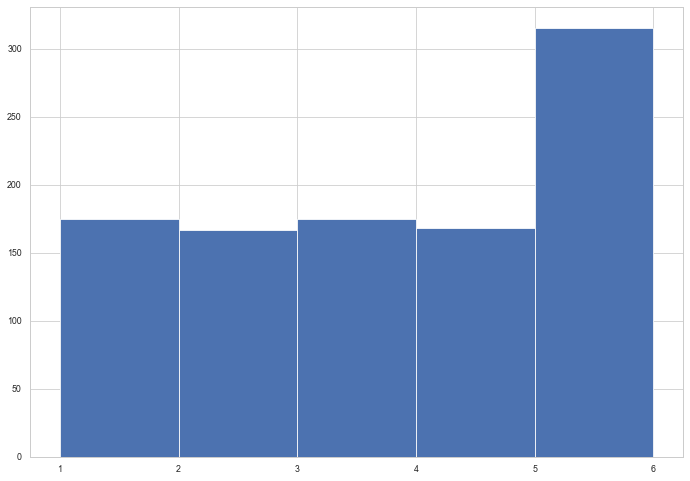

In [20]:
# your code here
data_1000=pd.read_csv('../data/roll_the_dice_thousand.csv')
data_1000_sort = data_1000.sort_values(by='value',ascending=False)
data_1000_sort.value.hist(bins=5)

In [21]:
"""
Frequency of outcome for all the dice numbers becomes more evenly distributed
as the no.of events(rolling the dice) are increased.
"""

'\nFrequency of outcome for all the dice numbers becomes more evenly distributed\nas the no.of events(rolling the dice) are increased.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [22]:
ages=pd.read_csv('../data/ages_population.csv')

<AxesSubplot:>

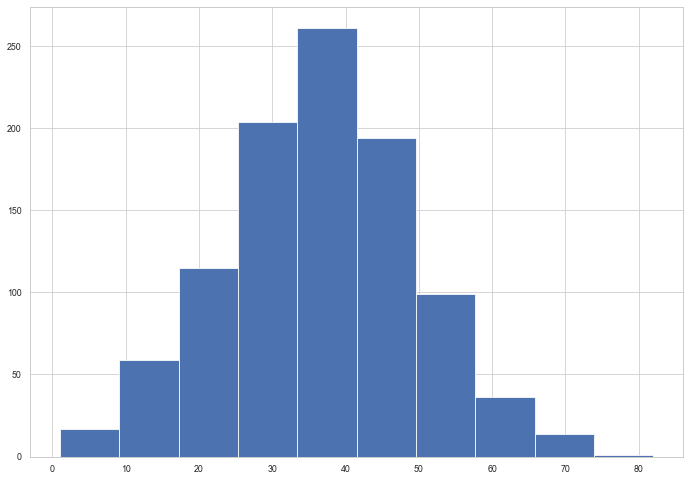

In [23]:
ages_sorted = ages.sort_values(by='observation')
ages_sorted.observation.hist(bins=10)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
# your code here
ages.mean()

observation    36.56
dtype: float64

In [25]:
ages.observation.std()

12.816499625976762

In [26]:
"""
#Estimations : mean - between 35 and 38 , std dev : around 20 
Standard deviation guessed was a bit away from the actual.
"""

'\n#Estimations : mean - between 35 and 38 , std dev : around 20 \nStandard deviation guessed was a bit away from the actual.\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

<AxesSubplot:>

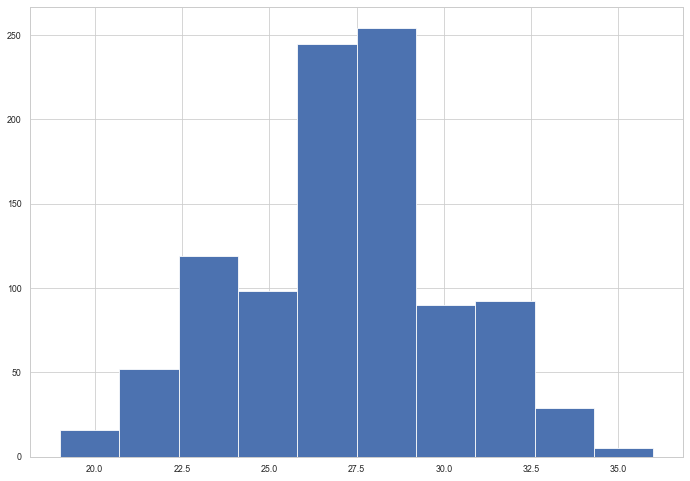

In [27]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2_sorted = ages2.sort_values(by='observation')
ages2_sorted.observation.hist(bins=10)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
Ages are less spread out ,and so the mean and standard deviation expected to be much lower than that in the previous one.
"""

'\nAges are less spread out ,and so the mean and standard deviation expected to be much lower than that in the previous one.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [29]:
# your code here
print(ages2.mean(),ages2.observation.std())

observation    27.155
dtype: float64 2.969813932689186


In [30]:
"""
As expected , the values of mean and standard deviation turned out to be much smaller than the previous one.
"""

'\nAs expected , the values of mean and standard deviation turned out to be much smaller than the previous one.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

In [31]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

<AxesSubplot:>

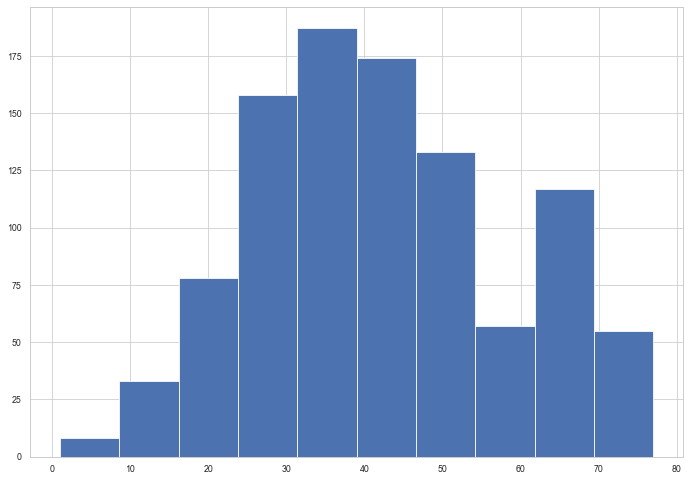

In [32]:
# your code here
ages3_sorted = ages3.sort_values(by='observation')
ages3_sorted.observation.hist(bins=10)

In [33]:
print(ages3.mean(),ages3.observation.std())

observation    41.989
dtype: float64 16.144705959865934


In [34]:
"""
From this plot it can be seen that the count of elder people (ages >60) went up here which caused the mean and deviation value
to go higher compared to the first plot.
"""

'\nFrom this plot it can be seen that the count of elder people (ages >60) went up here which caused the mean and deviation value\nto go higher compared to the first plot.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [35]:
# your code here
print(ages3.median())
quartiles = percentile(ages3_sorted, [25, 50, 75])
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])

observation    40.0
dtype: float64
Q1: 30.000
Median: 40.000
Q3: 53.000


In [36]:
"""
The difference of  1.989 between mean and median indicates a skewness in the data
Third quartile is highest, more datapoints are towards the right side.
"""

'\nThe difference of  1.989 between mean and median indicates a skewness in the data\nThird quartile is highest, more datapoints are towards the right side.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
# your code here
ages3.quantile([.75,.85,1], axis = 0) 

,observation
0.75,53.0
0.85,64.0
1.00,77.0


In [38]:
"""
As we move towards the right end, data becomes more densely distributed.
"""

'\nAs we move towards the right end, data becomes more densely distributed.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [39]:
# your code here

In [40]:
"""
your comments here
"""

'\nyour comments here\n'

In [47]:
#paolo:check ok